In [1]:
#importing packages
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime

Downloaded the RIVM covid data set containing the number of infections reported and the number of deceased reported. RIVM is our national institute for health and environment.
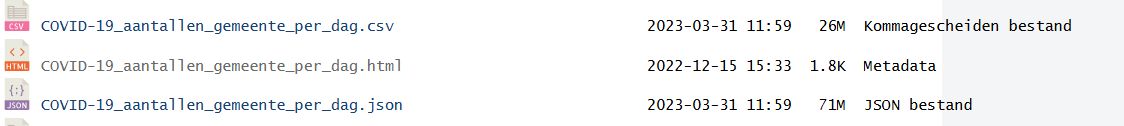


In [2]:
dataset_path = '~/datasets/EDAs/COVID-19_aantallen_gemeente_per_dag.csv'
df = pd.read_csv(dataset_path, sep=';')

First step: checking out the data...

In [3]:
print(df.shape)
df.head()

(201280, 12)


,Version,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Deceased
0,7,2023-03-31 10:00:00,2021-10-04,GM0014,Groningen,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,14,0
1,7,2023-03-31 10:00:00,2021-10-04,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,21,0
2,7,2023-03-31 10:00:00,2021-10-04,GM0037,Stadskanaal,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,2,0
3,7,2023-03-31 10:00:00,2021-10-04,GM0047,Veendam,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,2,0
4,7,2023-03-31 10:00:00,2021-10-04,GM0050,Zeewolde,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0


In [4]:
df.columns

Index(['Version', 'Date_of_report', 'Date_of_publication', 'Municipality_code',
       'Municipality_name', 'Province', 'Security_region_code',
       'Security_region_name', 'Municipal_health_service', 'ROAZ_region',
       'Total_reported', 'Deceased'],
      dtype='object')

In [5]:
df[df.Municipality_name=='Almere']

,Version,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Deceased
1,7,2023-03-31 10:00:00,2021-10-04,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,21,0
371,7,2023-03-31 10:00:00,2021-10-05,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,23,0
741,7,2023-03-31 10:00:00,2021-10-06,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,38,0
1111,7,2023-03-31 10:00:00,2021-10-07,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,35,0
1481,7,2023-03-31 10:00:00,2021-10-08,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
199431,7,2023-03-31 10:00:00,2023-03-27,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,4,9999
199801,7,2023-03-31 10:00:00,2023-03-28,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,3,9999
200171,7,2023-03-31 10:00:00,2023-03-29,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,2,9999
200541,7,2023-03-31 10:00:00,2023-03-30,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,9999


In [6]:
df[df.Municipality_name=='Almere'].Municipality_code.value_counts()

Municipality_code
GM0034    544
Name: count, dtype: int64

In [7]:
df.query('(Municipality_name=="Almere" and not Municipality_code=="GM0034") or (not Municipality_name=="Almere" and Municipality_code=="GM0034")')

,Version,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Deceased


Date_of_report seems to be constant, same for data of publication. This dataset is published on 2023-03-31.

In [8]:
print(df['Date_of_report'].value_counts())
print(df['Date_of_publication'].value_counts())

Date_of_report
2023-03-31 10:00:00    201280
Name: count, dtype: int64
Date_of_publication
2021-10-04    370
2021-10-05    370
2021-10-06    370
2021-10-07    370
2021-10-08    370
             ... 
2023-03-27    370
2023-03-28    370
2023-03-29    370
2023-03-30    370
2023-03-31    370
Name: count, Length: 544, dtype: int64


Apparently 1 date of report and 544 dates of publications, each with 370 entries. 
This suggests that date_of_publication does NOT refer to date of publication of this document. Let's delve into the meaning of the various variable a bit more.

From the metadata (https://data.rivm.nl/meta/srv/dut/catalog.search#/metadata/5f6bc429-1596-490e-8618-1ed8fd768427)

    Date_of_report: Date and time on which the data file was created by the RIVM.

    Date_of_publication: This concerns the number of new reports that have been received by the RIVM per day. The time period in which the report was passed on runs from 10:01 AM yesterday to 10:00 AM today. The publication date may differ from the date of the positive test result. This can happen if a report of a positive SARS-CoV-2 test is transferred later by a PHS to the RIVM. This file contains the most up-to-date notifications based on the OSIRIS source file. If corrections are made in OSIRIS, these corrections will also be processed in this file.

Furthermore: 

    The numbers concern Covid-19 reports since the first report in the Netherlands (27/02/2020).
    

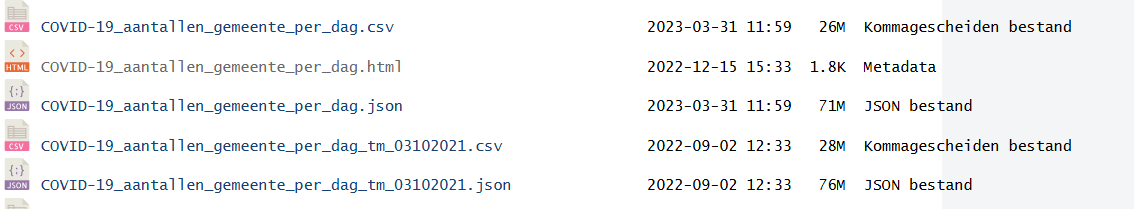

In [9]:
dataset_path = '~/datasets/EDAs/COVID-19_aantallen_gemeente_per_dag_tm_03102021.csv'
df_earlier = pd.read_csv(dataset_path, sep=';')
df = pd.concat([df_earlier,df],ignore_index=True)

In [10]:
print(df.shape)
df.head()


(418528, 12)


,Version,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Deceased
0,6,2022-09-02 10:00:00,2020-02-28,GM0014,Groningen,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0
1,6,2022-09-02 10:00:00,2020-02-28,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0
2,6,2022-09-02 10:00:00,2020-02-28,GM0037,Stadskanaal,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0
3,6,2022-09-02 10:00:00,2020-02-28,GM0047,Veendam,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0
4,6,2022-09-02 10:00:00,2020-02-28,GM0050,Zeewolde,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0


In [11]:
df.describe()

,Version,Total_reported,Deceased
count,418528.000000,418528.000000,418528.000000
mean,6.480924,20.571290,795.621060
std,0.499637,89.470156,2705.895499
min,6.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000
50%,6.000000,3.000000,0.000000
75%,7.000000,13.000000,0.000000
max,7.000000,9444.000000,9999.000000


In [12]:
df.dtypes

Version                      int64
Date_of_report              object
Date_of_publication         object
Municipality_code           object
Municipality_name           object
Province                    object
Security_region_code        object
Security_region_name        object
Municipal_health_service    object
ROAZ_region                 object
Total_reported               int64
Deceased                     int64
dtype: object

In [13]:
df.describe(include=['object'])

,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region
count,418528,418528,389200,389200,417400,416272,416272,417400,410632
unique,2,1128,345,345,12,25,25,25,11
top,2022-09-02 10:00:00,2020-02-28,GM0439,Purmerend,Noord-Brabant,VR09,Utrecht,GGD Regio Utrecht,Netwerk Acute Zorg Brabant
freq,217248,372,2256,2256,66552,30456,30456,30456,66552


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418528 entries, 0 to 418527
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Version                   418528 non-null  int64 
 1   Date_of_report            418528 non-null  object
 2   Date_of_publication       418528 non-null  object
 3   Municipality_code         389200 non-null  object
 4   Municipality_name         389200 non-null  object
 5   Province                  417400 non-null  object
 6   Security_region_code      416272 non-null  object
 7   Security_region_name      416272 non-null  object
 8   Municipal_health_service  417400 non-null  object
 9   ROAZ_region               410632 non-null  object
 10  Total_reported            418528 non-null  int64 
 11  Deceased                  418528 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 38.3+ MB


In [15]:
df = df.drop(['Municipality_code','Security_region_code'],axis=1)

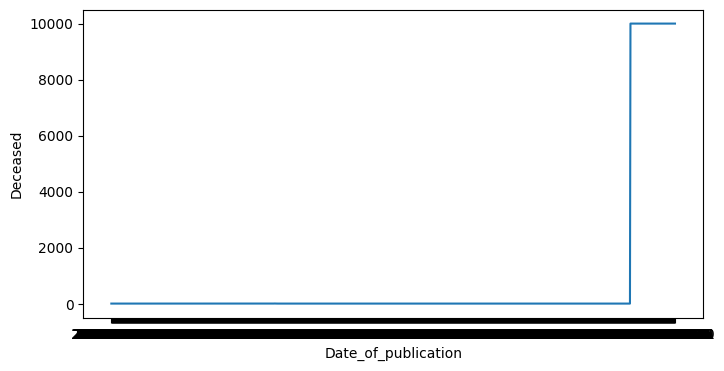

In [16]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df.query('Municipality_name=="Arnhem"'),x='Date_of_publication',y='Deceased')
plt.show()

https://data.rivm.nl/meta/srv/dut/catalog.search#/metadata/5f6bc429-1596-490e-8618-1ed8fd768427

Deceased: The number of deceased persons reported to the PHSs who have tested positive for SARS-CoV-2 and have been published by the RIVM on [Date_of_publication]. The actual number of deceased persons positive for SARS-CoV-2 is higher than the number of reports in the surveillance, because not all deceased persons are tested. This is because there is no obligation to report the death of persons with a positive SARS-CoV-2 test result. From January 1, 2023, this column is set to 9999.

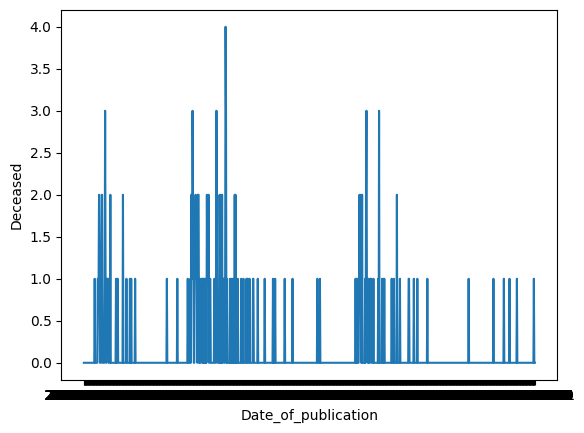

In [17]:
sns.lineplot(data=df.query('Date_of_publication<"2023-01-01" and Municipality_name=="Arnhem"'),x='Date_of_publication',y='Deceased')
plt.show()

In [18]:
df[['Date_of_publication','Date_of_report']]=df[['Date_of_publication','Date_of_report']].apply(pd.to_datetime)

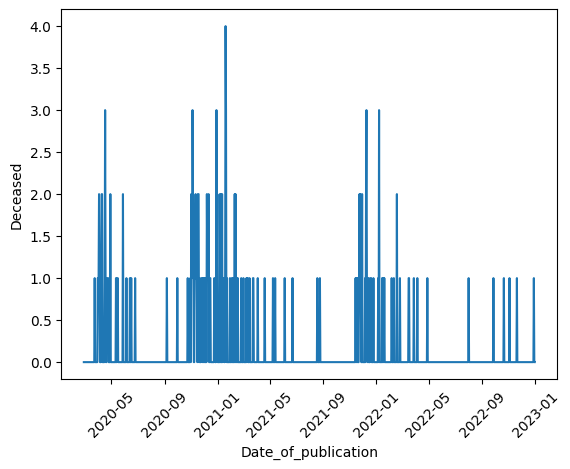

In [19]:
plt.xticks(rotation=45)
sns.lineplot(data=df.query('Date_of_publication<"2023-01-01" and Municipality_name=="Arnhem"'),x='Date_of_publication',y='Deceased')
plt.show()

Let's look at the situation in Amsterdam.

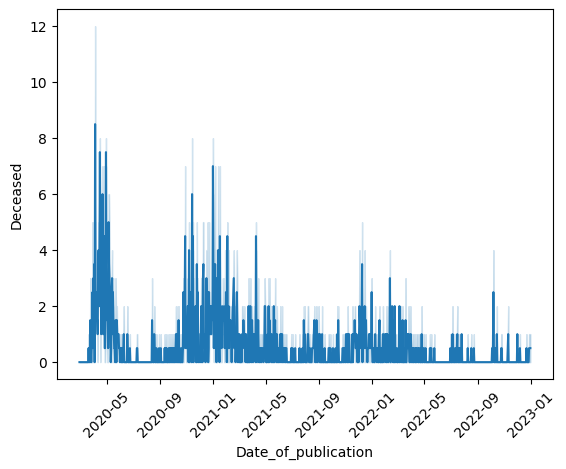

In [21]:
plt.xticks(rotation=45)
sns.lineplot(data=df.query('Date_of_publication<"2023-01-01" and Municipality_name=="Amsterdam"'),x='Date_of_publication',y='Deceased')
plt.show()

In [22]:
df.query('Date_of_publication<"2023-01-01" and Municipality_name=="Amsterdam"')

,Version,Date_of_report,Date_of_publication,Municipality_name,Province,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Deceased
106,6,2022-09-02 10:00:00,2020-02-28,Amsterdam,Noord-Holland,Amsterdam-Amstelland,GGD Amsterdam,Netwerk Acute Zorg Noordwest,0,0
107,6,2022-09-02 10:00:00,2020-02-28,Amsterdam,Noord-Holland,Amsterdam-Amstelland,GGD Amsterdam,SpoedZorgNet,0,0
478,6,2022-09-02 10:00:00,2020-02-29,Amsterdam,Noord-Holland,Amsterdam-Amstelland,GGD Amsterdam,Netwerk Acute Zorg Noordwest,0,0
479,6,2022-09-02 10:00:00,2020-02-29,Amsterdam,Noord-Holland,Amsterdam-Amstelland,GGD Amsterdam,SpoedZorgNet,1,0
850,6,2022-09-02 10:00:00,2020-03-01,Amsterdam,Noord-Holland,Amsterdam-Amstelland,GGD Amsterdam,Netwerk Acute Zorg Noordwest,0,0
...,...,...,...,...,...,...,...,...,...,...
384225,7,2023-03-31 10:00:00,2022-12-29,Amsterdam,Noord-Holland,Amsterdam-Amstelland,GGD Amsterdam,SpoedZorgNet,17,0
384594,7,2023-03-31 10:00:00,2022-12-30,Amsterdam,Noord-Holland,Amsterdam-Amstelland,GGD Amsterdam,Netwerk Acute Zorg Noordwest,24,1
384595,7,2023-03-31 10:00:00,2022-12-30,Amsterdam,Noord-Holland,Amsterdam-Amstelland,GGD Amsterdam,SpoedZorgNet,16,0
384964,7,2023-03-31 10:00:00,2022-12-31,Amsterdam,Noord-Holland,Amsterdam-Amstelland,GGD Amsterdam,Netwerk Acute Zorg Noordwest,26,1


In [23]:
df.Municipality_name.value_counts()

Municipality_name
Purmerend         2256
Amsterdam         2256
Landgraaf         1128
Wormerland        1128
Zundert           1128
                  ... 
Leusden           1128
Westvoorne         584
Brielle            584
Hellevoetsluis     584
Voorne aan Zee     544
Name: count, Length: 345, dtype: int64

In [24]:
df_new = df.drop_duplicates()

In [25]:
df_new.Municipality_name.value_counts()

Municipality_name
Purmerend         2256
Amsterdam         2256
Landgraaf         1128
Wormerland        1128
Zundert           1128
                  ... 
Leusden           1128
Westvoorne         584
Brielle            584
Hellevoetsluis     584
Voorne aan Zee     544
Name: count, Length: 345, dtype: int64

Multiple reports on the same day from different ROAZ regions. How to deal with this?

In [26]:
df_new = df.query('Date_of_publication<"2023-01-01"')

Compare deceased across provinces.
Trick: Pivot tables

In [27]:
df_piv = df_new.pivot_table(index='Date_of_publication',columns='Province',values='Deceased',aggfunc='sum')
df_piv.head()

Province,Drenthe,Flevoland,Fryslân,Gelderland,Groningen,Limburg,Noord-Brabant,Noord-Holland,Overijssel,Utrecht,Zeeland,Zuid-Holland
Date_of_publication,,,,,,,,,,,,
2020-02-28,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-29,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-02,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0


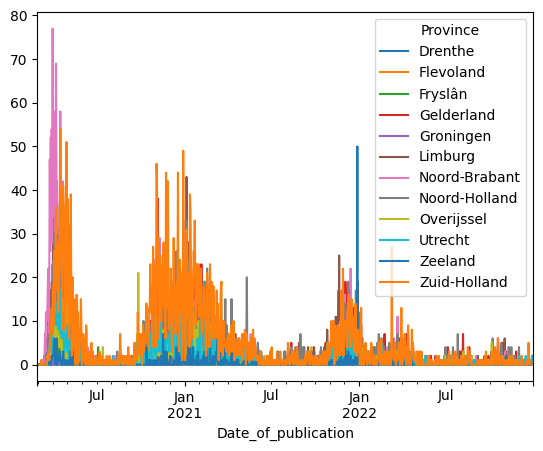

In [28]:
df_piv.plot()
plt.show()

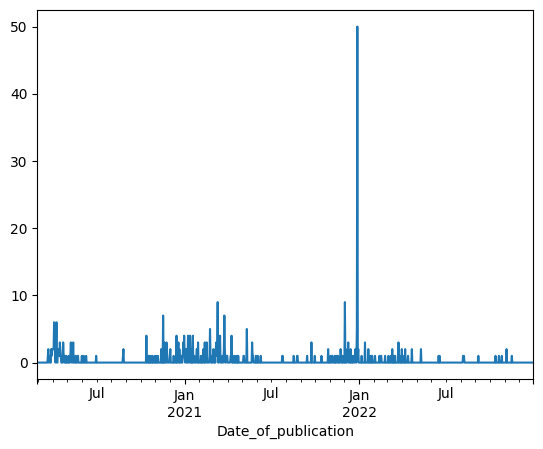

In [29]:
df_piv.Zeeland.plot()
plt.show()


In [30]:
df_new.query('Province=="Zeeland" and Date_of_publication>"2021-12-25" and Date_of_publication<"2022-01-01"')[["Date_of_publication","Deceased"]].groupby("Date_of_publication").sum()

,Deceased
Date_of_publication,
2021-12-26,0
2021-12-27,5
2021-12-28,50
2021-12-29,1
2021-12-30,2
2021-12-31,0


In [31]:
df_new.query('Province=="Zeeland" and Date_of_publication=="2021-12-28"')[['Municipality_name','Deceased']]

/tmp/ipykernel_355/3638137079.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_new.query('Province=="Zeeland" and Date_of_publication=="2021-12-28"')[['Municipality_name','Deceased']]


,Municipality_name,Deceased
248877,Borsele,2
248878,Goes,4
248880,Hulst,5
248881,Kapelle,2
248882,Middelburg,8
248883,Reimerswaal,3
248884,Terneuzen,5
248885,Tholen,1
248886,Veere,7
248887,Vlissingen,4


In [32]:
df_new.query('Province=="Zeeland" and Date_of_publication=="2021-12-27"')[['Municipality_name','Deceased']]

/tmp/ipykernel_355/188252579.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_new.query('Province=="Zeeland" and Date_of_publication=="2021-12-27"')[['Municipality_name','Deceased']]


,Municipality_name,Deceased
248507,Borsele,0
248508,Goes,4
248510,Hulst,0
248511,Kapelle,0
248512,Middelburg,0
248513,Reimerswaal,0
248514,Terneuzen,1
248515,Tholen,0
248516,Veere,0
248517,Vlissingen,0


In [33]:
df_new.query('Province=="Zeeland" and Date_of_publication=="2021-12-26"')[['Municipality_name','Deceased']]

/tmp/ipykernel_355/1985121737.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_new.query('Province=="Zeeland" and Date_of_publication=="2021-12-26"')[['Municipality_name','Deceased']]


,Municipality_name,Deceased
248137,Borsele,0
248138,Goes,0
248140,Hulst,0
248141,Kapelle,0
248142,Middelburg,0
248143,Reimerswaal,0
248144,Terneuzen,0
248145,Tholen,0
248146,Veere,0
248147,Vlissingen,0


In [34]:
df_new.query('Province=="Zeeland" and Date_of_publication=="2021-12-25"')[['Municipality_name','Deceased']]

/tmp/ipykernel_355/1734002149.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_new.query('Province=="Zeeland" and Date_of_publication=="2021-12-25"')[['Municipality_name','Deceased']]


,Municipality_name,Deceased
247767,Borsele,0
247768,Goes,0
247770,Hulst,0
247771,Kapelle,0
247772,Middelburg,1
247773,Reimerswaal,0
247774,Terneuzen,0
247775,Tholen,0
247776,Veere,0
247777,Vlissingen,0


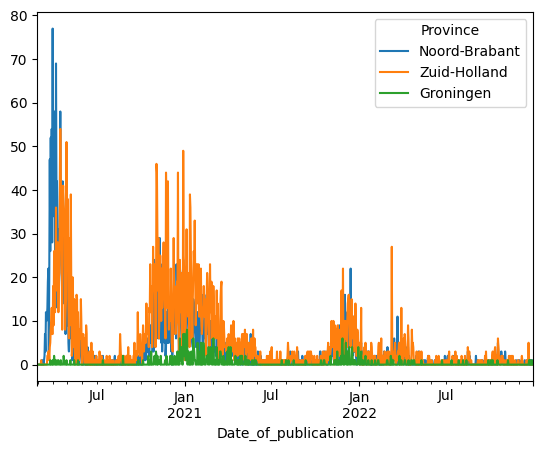

In [35]:
df_piv[['Noord-Brabant','Zuid-Holland','Groningen']].plot()
plt.show()

First Noord-Brabant, then Zuid-Holland, then Groningen (if at all).

In [36]:
df_piv2 = df_new.pivot_table(index='Date_of_publication',columns='Province',values='Total_reported',aggfunc='sum')

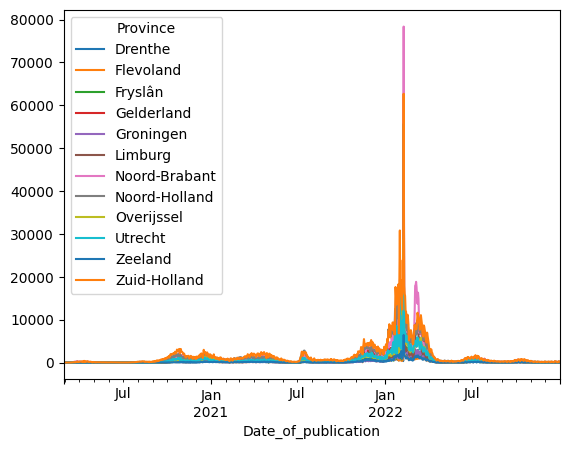

In [37]:
df_piv2.plot()
plt.show()

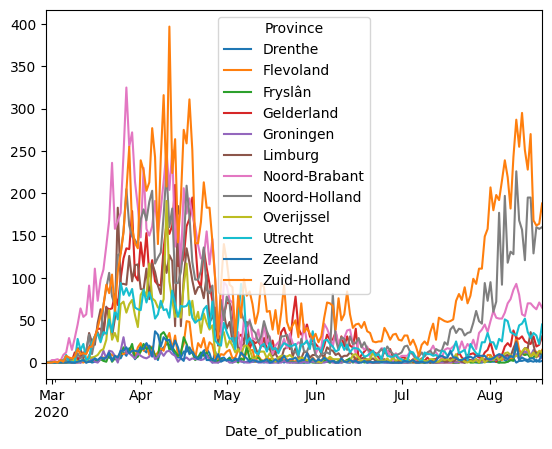

In [38]:
df_piv2.query('Date_of_publication<"2020-08-20"').plot()
plt.show()

Let's compare the deceased and the total reported.

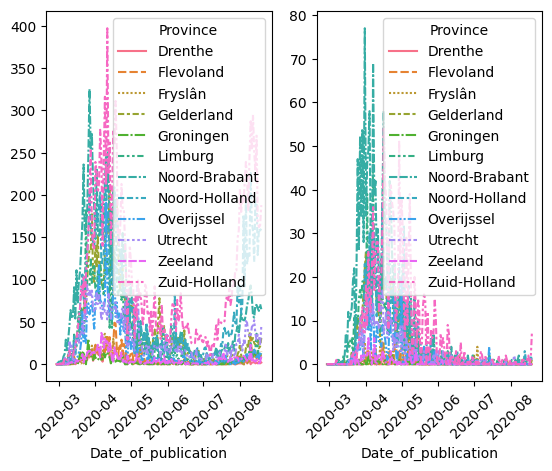

In [39]:
plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.lineplot(data=df_piv2.query('Date_of_publication<"2020-08-20"'))
plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.lineplot(data=df_piv.query('Date_of_publication<"2020-08-20"'))
plt.show()

This is not optimal... What would we like?

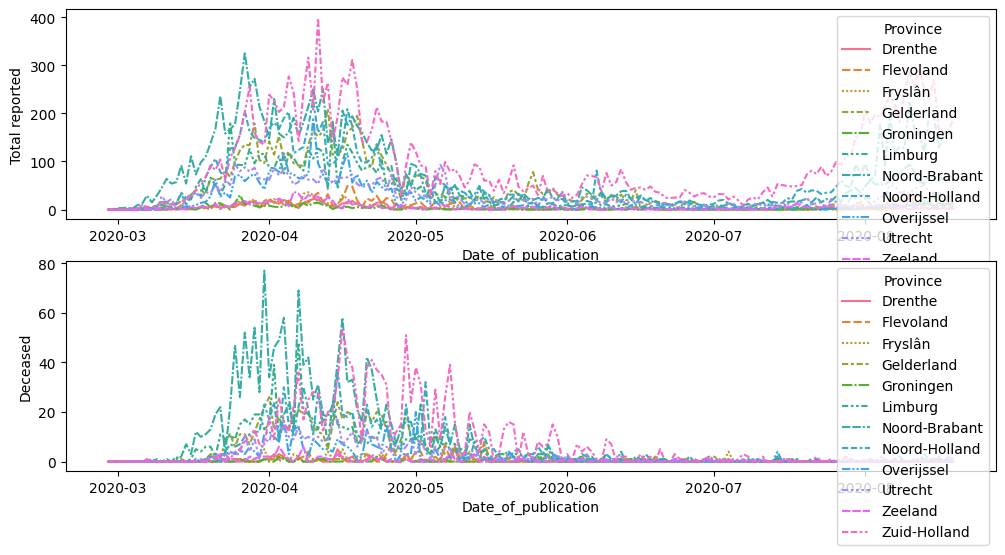

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1).set_ylabel('Total reported')
sns.lineplot(data=df_piv2.query('Date_of_publication<"2020-08-20"'))
plt.subplot(2,1,2).set_ylabel('Deceased')
sns.lineplot(data=df_piv.query('Date_of_publication<"2020-08-20"'))
plt.show()